In [43]:
import pandas as pd
import json
from tqdm import tqdm
import numpy as np

%matplotlib inline

In [6]:
with open("../data/scraped_data.json") as f:
    scraped_data = json.load(f)

In [7]:
len(scraped_data)

24742

In [8]:
def deserialize(item, attribute="", result={}):
    for key, value in item.items():
        if isinstance(value, dict):
            result = deserialize(value, str(key).upper(), result)
        elif isinstance(value, set) or isinstance(value, list):
            for idx, v in enumerate(list(value)):
                result[key.upper() + "_" + str(idx + 1)] = v 
        else:
            result[attribute + "_" + key.upper()] = value
    return result

In [9]:
interesting_s3_dataset_features=["age","averageRating","composer_1","composer_2","composer_3","composer_4","is_action","is_adult","is_adventure","is_animation","is_biography","is_comedy","is_crime","is_documentary","is_drama","is_family","is_fantasy","is_film-noir","is_game-show","is_history","is_horror","is_music","is_musical","is_mystery","is_news","is_reality-tv","is_romance","is_sci-fi","is_short","is_sport","is_talk-show","is_thriller","is_war","is_western","numVotes","runtimeMinutes"]

In [10]:
len(interesting_s3_dataset_features)

36

In [11]:
df_movies = pd.read_csv("../data/movies_with_cast_data_20171104.csv", sep=";")

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (19,21,22,24,25,26,42,44,45,47,48,50,55,57,58,60,61,63,64,66,70,71,72,74,75,76,77,78,82,84,88,90,95,97,98,100,103,105,106,108,109,110,111,112,113,114,124,126,127,129,139,141,142,144,145,147,151,153,163,165,166,168,175,177,178,180,184,186,187,189,220,221,225,226,227,229,230,231,232,234,235,236,240,242,243,245,252,254,255,257,258,260,274,276,277,279,280,282,283,285,290,292,296,298,299,300,302,304,308,310,311,312,322,324,325,327,328,330,331,332,333,335,336,338,339,341,342,344,345,347,348,350,351,352,353,355,358,360,364,366,367,369,385,387,388,390) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
movie_s3_data = {v["tconst"] : v for k,v in df_movies.to_dict(orient="index").items()}

In [16]:
imdb_result = {}
for item in tqdm(scraped_data):
    imdb_result[item["movie"]] = deserialize(item["data"], "", {})
    for feature in interesting_s3_dataset_features:
        imdb_result[item["movie"]][feature.upper()] = movie_s3_data[item["movie"]].get(feature)

100%|██████████| 24742/24742 [00:01<00:00, 12423.50it/s]


In [24]:
with open("../data/IMDB_FULL_DATA.json", "w") as f:
    json.dump(imdb_result, f)

In [30]:
list(imdb_result.keys())[0]

'tt0070122'

In [38]:
df = pd.DataFrame(data=list(imdb_result.values()), columns=sorted(imdb_result["tt0070122"].keys()), index=imdb_result.keys())

In [39]:
df.shape

(24742, 67)

In [40]:
df.head()

AGE  AVERAGERATING  CASTING_NM0242290  CASTING_NM0370672  \
tt0070122  44.0            4.5                4.0                3.0   
tt0038492  71.0            7.0                NaN                NaN   
tt0380732  14.0            6.5                NaN                NaN   
tt0059878  52.0            3.3                NaN                NaN   
tt0070557  44.0            7.6                NaN                NaN   

           CASTING_NM0407420  CASTING_NM0442904  CASTING_NM0464511  \
tt0070122                9.0                2.0               13.0   
tt0038492                NaN                NaN                NaN   
tt0380732                NaN                NaN                NaN   
tt0059878                NaN                NaN                NaN   
tt0070557                NaN                NaN                NaN   

           CASTING_NM0643883  CASTING_NM0653005  CASTING_NM0765789  \
tt0070122               12.0                6.0                1.0   
tt0038492                NaN                NaN                NaN   
tt0380732                NaN                NaN                NaN   
tt0059878                NaN                NaN                NaN   
tt0070557                NaN                NaN                NaN   

                                 ...                          \
tt0070122                        ...                           
tt0038492                        ...                           
tt0380732                        ...                           
tt0059878                        ...                           
tt0070557                        ...                           

                       PRODUCTORS_1  RUNTIMEMINUTES     STAR_1     STAR_2  \
tt0070122              Toho Company            82.0  nm0370672  nm0765789   
tt0038492     Twentieth Century Fox           103.0  nm0001637  nm0000074   
tt0380732                  Go Films            97.0  nm0399088  nm0194788   
tt0059878      Berkeley Productions            81.0  nm0186844  nm0456565   
tt0070557  Zespol Filmowy "Pryzmat"            82.0  nm0688684  nm0194387   

              STAR_3   WRITER_1   WRITER_2 _METASCORE  \
tt0070122  nm0442904  nm0297974  nm0454119        NaN   
tt0038492  nm0404158  nm0000581  nm0786073        NaN   
tt0380732  nm1011103  nm1451437  nm1100565        NaN   
tt0059878  nm0000977  nm0128845  nm0920229        NaN   
tt0070557  nm0092007  nm0054402  nm0270204        NaN   

                                                  _STORYLINE  \
tt0070122  \nThe underground kingdom of Seatopia sends ou...   
tt0038492  \nIn 1844, the Wells family lives in a small f...   
tt0380732  \nIn Montreal, on the same day that a policema...   
tt0059878  \nMike thinks he's hit the jackpot when his gi...   
tt0070557  \nStanislaw works in an art museum in Warsaw; ...   

                                                   _SYNOPSIS  
tt0070122  The undersea nation of Seatopia sends the giga...  
tt0038492  A simple Connecticut farm girl is recruited by...  
tt0380732  In Montreal, on the same day that a policeman ...  
tt0059878  Delinquent teen-agers ingest a substance and g...  
tt0070557  Falsely accused Warsaw art museum assistant go...  

[5 rows x 67 columns]

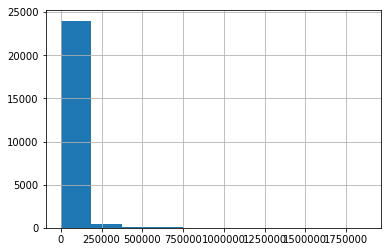

In [44]:
df["NUMVOTES"].hist()

In [45]:
df[df["NUMVOTES"] > 10000].shape

(7168, 67)

In [51]:
columns_to_keep = ['AVERAGERATING', 'AWARDS_NB_OSCAR_NOMINATIONS', 'AWARDS_NB_OSCAR_WON', 'AWARDS_NB_OTHER_NOMINATIONS', 'AWARDS_NB_OTHER_WINS', 'COMPOSER_1', 'COMPOSER_2', 'COMPOSER_3', 'COMPOSER_4', 'COUNTRIES_1', 'COUNTRIES_10', 'COUNTRIES_11', 'COUNTRIES_12', 'COUNTRIES_13', 'COUNTRIES_14', 'COUNTRIES_15', 'COUNTRIES_16', 'COUNTRIES_2', 'COUNTRIES_3', 'COUNTRIES_4', 'COUNTRIES_5', 'COUNTRIES_6', 'COUNTRIES_7', 'COUNTRIES_8', 'COUNTRIES_9', 'CRITICS_CRITIC', 'CRITICS_USER', 'DETAILS_BUDGET', 'DETAILS_GROSS', 'DETAILS_RELEASE_DATE', 'DETAILS_WORLDWIDE_GROSS', 'DIRECTOR_1', 'DIRECTOR_2', 'IS_ACTION', 'IS_ADULT', 'IS_ADVENTURE', 'IS_ANIMATION', 'IS_BIOGRAPHY', 'IS_COMEDY', 'IS_CRIME', 'IS_DOCUMENTARY', 'IS_DRAMA', 'IS_FAMILY', 'IS_FANTASY', 'IS_FILM-NOIR', 'IS_GAME-SHOW', 'IS_HISTORY', 'IS_HORROR', 'IS_MUSIC', 'IS_MUSICAL', 'IS_MYSTERY', 'IS_NEWS', 'IS_REALITY-TV', 'IS_ROMANCE', 'IS_SCI-FI', 'IS_SHORT', 'IS_SPORT', 'IS_TALK-SHOW', 'IS_THRILLER', 'IS_WAR', 'IS_WESTERN', 'LANG_1', 'LANG_10', 'LANG_11', 'LANG_12', 'LANG_13', 'LANG_14', 'LANG_15', 'LANG_16', 'LANG_17', 'LANG_18', 'LANG_19', 'LANG_2', 'LANG_3', 'LANG_4', 'LANG_5', 'LANG_6', 'LANG_7', 'LANG_8', 'LANG_9', 'NUMVOTES', 'OFFICIAL_SITES_1', 'OFFICIAL_SITES_2', 'PRODUCTORS_1', 'PRODUCTORS_2', 'PRODUCTORS_3', 'RUNTIMEMINUTES', 'STAR_1', 'STAR_2', 'STAR_3', 'WRITER_1', 'WRITER_2', '_METASCORE', '_STORYLINE', '_SYNOPSIS']

In [52]:
data_to_export = {k: {k_: v_ for k_,v_ in v.items() if k_ in set(columns_to_keep)} for k,v in imdb_result.items() if v["NUMVOTES"] > 10000}

In [53]:
with open("../data/IMDB_SCRAPED_DATA.json", "w") as f:
    json.dump(data_to_export, f)